##**Лабораторная работа №3**
Мокробородова Юлия
РИ-481223

##Задание 1

In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 
              50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

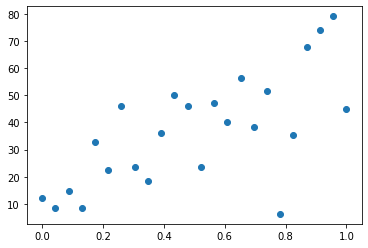

In [96]:
plt.scatter(x, y);

##Линейная регрессия

In [201]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 
              50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24).reshape(-1,1)

In [427]:
print(x)

[[0.        ]
 [0.04347826]
 [0.08695652]
 [0.13043478]
 [0.17391304]
 [0.2173913 ]
 [0.26086957]
 [0.30434783]
 [0.34782609]
 [0.39130435]
 [0.43478261]
 [0.47826087]
 [0.52173913]
 [0.56521739]
 [0.60869565]
 [0.65217391]
 [0.69565217]
 [0.73913043]
 [0.7826087 ]
 [0.82608696]
 [0.86956522]
 [0.91304348]
 [0.95652174]
 [1.        ]]


In [428]:
print(y)

[12.19  8.41 14.68  8.64 32.94 22.61 45.92 23.63 18.59 36.22 50.1  46.22
 23.63 47.3  40.03 56.53 38.41 51.47  6.29 35.41 67.79 74.21 79.12 45.1 ]


In [202]:
from sklearn.linear_model import LinearRegression 
slr = LinearRegression() 
slr.fit(x, y) 
y_pred = slr.predict(x) 
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: 46.51
Intercept: 13.64


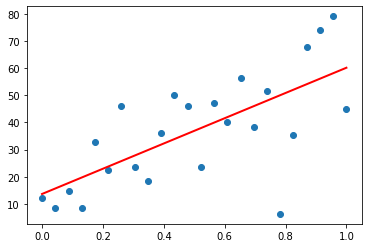

In [203]:
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=2)

In [204]:
from sklearn.metrics import mean_squared_error

In [209]:
mean_squared_error(x, y_pred)

1512.0847394045893

##Полином 2-й степени

In [107]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

In [108]:
X = list(zip(np.ones(24), x, x*x))

In [109]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [93]:
W

array([   5.65033333,  143.52996465, -233.63225758,  149.68562626])

In [31]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x

In [32]:
f(x, W)

array([12.1867    , 14.5875087 , 16.95389842, 19.28586917, 21.58342095,
       23.84655375, 26.07526759, 28.26956245, 30.42943834, 32.55489526,
       34.6459332 , 36.70255217, 38.72475217, 40.7125332 , 42.66589526,
       44.58483834, 46.46936245, 48.31946759, 50.13515375, 51.91642095,
       53.66326917, 55.37569842, 57.0537087 , 58.6973    ])

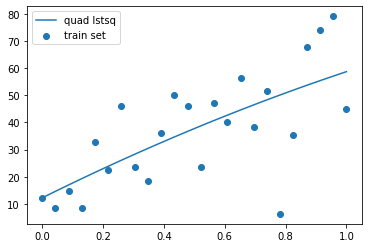

In [33]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
mean_squared_error(y, f(x, W))

218.24309186403494

##Полином 3-й степени

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
X = list(zip(np.ones(24), x, x*x, x*x*x))

In [46]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [47]:
W

array([   5.65033333,  143.52996465, -233.63225758,  149.68562626])

In [48]:
def f(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x

In [49]:
f(x, W)

array([ 5.65033333, 11.46142029, 16.46302503, 20.72896311, 24.33305007,
       27.34910145, 29.85093281, 31.91235968, 33.60719763, 35.00926219,
       36.19236891, 37.23033333, 38.19697101, 39.1660975 , 40.21152833,
       41.40707905, 42.82656522, 44.54380237, 46.63260606, 49.16679183,
       52.22017523, 55.86657181, 60.1797971 , 65.23366667])

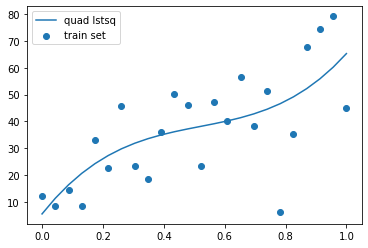

In [50]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(y, f(x, W))

202.513036590909

## Экспонента

In [116]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

In [117]:
X = list(zip(np.ones(24), np.exp(x)))

In [118]:
W = np.linalg.lstsq(X, y, rcond=None)[0]

In [119]:
W

array([-9.42279902, 26.85911292])

In [120]:
def f(x, w): 
    return w[0] + w[1]*np.exp(x)

In [121]:
f(x, W)

array([17.43631391, 18.62986007, 19.87644418, 21.17842312, 22.53825847,
       23.95852121, 25.44189658, 26.99118913, 28.60932804, 30.29937266,
       32.06451828, 33.90810219, 35.83360996, 37.84468208, 39.9451208 ,
       42.13889731, 44.43015931, 46.82323878, 49.32266021, 51.93314915,
       54.65964115, 57.50729105, 60.4814828 , 63.58783957])

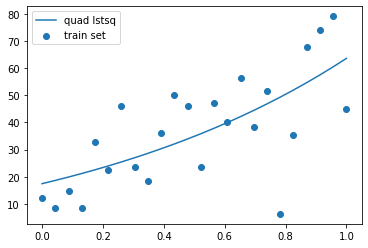

In [122]:
plt.scatter(x, y, label='train set')
plt.plot(x, f(x, W), label='quad lstsq')
plt.legend();

In [123]:
mean_squared_error(y, f(x, W))

218.24309186403494

### Задание 2

###sklearn.linear_model.LinearRegression


In [217]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [373]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [374]:
X_train = diabetes_X[:-10]
X_test = diabetes_X[-10:]

In [375]:
y_train = diabetes_y[:-10]
y_test = diabetes_y[-10:]

In [376]:
regr = linear_model.LinearRegression()

In [377]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [378]:
y_pred = regr.predict(X_test)

In [379]:
print(regr.coef_)

[941.79757086]


In [380]:
print(r2_score(y_test, y_pred))

0.3972027841396436


In [381]:
mean_squared_error(y_test, y_pred)

2118.597122834967

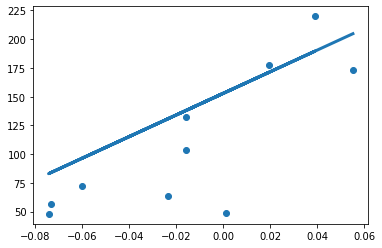

In [387]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, linewidth=3)

plt.show()

###sklearn.linear_model.Ridge



In [408]:
ridge_regr = linear_model.Ridge(alpha=0.5)

In [409]:
ridge_regr.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [410]:
y_pred = ridge_regr.predict(X_test)

In [411]:
print(ridge_regr.coef_)

[623.51354005]


In [412]:
r2_score(y_test, y_pred)

0.19780548386433372

In [413]:
mean_squared_error(y_test,y_pred)

2819.400868355574

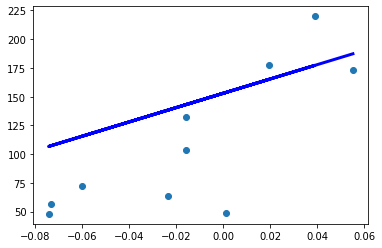

In [414]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

##sklearn.linear_model.Lasso


In [395]:
lasso_regr = linear_model.Lasso(alpha=0.001)

In [396]:
lasso_regr.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [397]:
y_pred = lasso_regr.predict(X_test)

In [398]:
print(lasso_regr.coef_)

[941.35652606]


In [399]:
r2_score(y_test, y_pred)

0.3970084812954232

In [400]:
mean_squared_error(y_test,y_pred)

2119.2800215542925

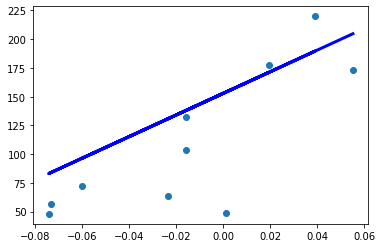

In [401]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

###sklearn.linear_model.ElasticNet


In [421]:
EN_regr = linear_model.ElasticNet(alpha=0.001)

In [422]:
EN_regr.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [423]:
y_pred = EN_regr.predict(X_test)
print(EN_regr.coef_)

[771.45413281]


In [424]:
r2_score(y_test, y_pred)

0.30522806153701176

In [425]:
mean_squared_error(y_test,y_pred)

2441.852402641403

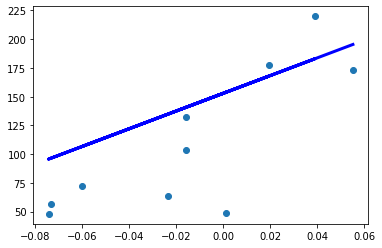

In [426]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

По показателям MSE наивысший результат показала модель Ridge, наименьший показатель имеет - LinearRegression